## Explorando el API pública de [Open Bike Share Data](https://bikeshare-research.org/)

En este ejercicio realizaremos la exploracion de datos usando el API. de BikeShare

¿Qué es Open Bike Share Data?

La investigación del sistema de bicicletas compartidas (BSS), más allá del análisis de sistemas individuales, requiere una gran recopilación y análisis de datos. Bike Share Research (BSR) tiene como objetivo facilitar la conservación de datos BSS a través de una plataforma de datos colaborativa y abierta al tiempo que la hace accesible mediante API.

En el siguiente apartado haremos el ejercicio de explorar 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import requests
import json
import pandas as pd

url = 'http://bikeshare-research.org/api/v1/categories/data/systems/chicago'

def parse_response(response):
    return json.loads(response.text)

def get_feed_from_list(feed_name, feed_list):
    for feed in feed_list:
        if feed["name"] == feed_name:
            return feed;
    
    return None

# getting main data from chicago's bycicle system
chicago_data = parse_response(requests.get(url))[0]

# getting feed data
url_chicago_feed = chicago_data["feedurl"]
all_feeds = parse_response(requests.get(url_chicago_feed))

# spanish feed url's
es_feed = all_feeds['data']['es']['feeds']
es_feed_df = pd.DataFrame.from_dict(es_feed)
display(es_feed_df)

,name,url
0,gbfs,https://gbfs.lyft.com/gbfs/1.1/chi/gbfs.json
1,ebikes_at_stations,https://gbfs.lyft.com/gbfs/1.1/chi/es/ebikes_a...
2,system_information,https://gbfs.lyft.com/gbfs/1.1/chi/es/system_i...
3,station_information,https://gbfs.lyft.com/gbfs/1.1/chi/es/station_...
4,station_status,https://gbfs.lyft.com/gbfs/1.1/chi/es/station_...
5,free_bike_status,https://gbfs.lyft.com/gbfs/1.1/chi/es/free_bik...
6,system_hours,https://gbfs.lyft.com/gbfs/1.1/chi/es/system_h...
7,system_calendar,https://gbfs.lyft.com/gbfs/1.1/chi/es/system_c...
8,system_regions,https://gbfs.lyft.com/gbfs/1.1/chi/es/system_r...
9,system_pricing_plans,https://gbfs.lyft.com/gbfs/1.1/chi/es/system_p...


### Información de las estaciones de bicicletas de chicago

En el siguiente apartado vamos a analizar la información de las estaciones de bicicletas en chicago, es interesante ver la capacidad del número de bicicletas de alguna de las estaciones

In [72]:
station_information_url = es_feed_df[es_feed_df["name"] == "station_information"]['url'].values[0]
station_info_response = parse_response(requests.get(station_information_url))
station_data = station_info_response['data']['stations']

station_info_df = pd.DataFrame.from_dict(station_data)
display(station_info_df.head())

,lon,rental_uris,electric_bike_surcharge_waiver,external_id,eightd_has_key_dispenser,rental_methods,capacity,station_type,station_id,has_kiosk,name,short_name,eightd_station_services,lat,region_id,address
0,-87.643020,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",False,a21de1a5-f5bc-4b50-8a13-aa28b7dcfa95,False,"[KEY, CREDITCARD, TRANSITCARD]",15,classic,a21de1a5-f5bc-4b50-8a13-aa28b7dcfa95,True,Halsted St & 96th St,20105,[],41.719712,NaN,NaN
1,-87.590368,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",False,a3a5a9d0-a135-11e9-9cda-0a87ae2ba916,False,"[KEY, CREDITCARD, TRANSITCARD]",19,classic,a3a5a9d0-a135-11e9-9cda-0a87ae2ba916,True,Blackstone Ave & Hyde Park Blvd,13398,[],41.802562,NaN,NaN
2,-87.552812,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",False,a3b2905a-a135-11e9-9cda-0a87ae2ba916,False,"[KEY, CREDITCARD, TRANSITCARD]",11,classic,a3b2905a-a135-11e9-9cda-0a87ae2ba916,True,Exchange Ave & 79th St,580,[],41.751731,NaN,NaN
3,-87.672069,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",False,a3b419d9-a135-11e9-9cda-0a87ae2ba916,False,"[KEY, CREDITCARD, TRANSITCARD]",15,classic,a3b419d9-a135-11e9-9cda-0a87ae2ba916,True,Wood St & Chicago Ave,637,[],41.895634,NaN,NaN
4,-87.654691,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",False,a3aaa68b-a135-11e9-9cda-0a87ae2ba916,False,"[KEY, CREDITCARD, TRANSITCARD]",19,classic,a3aaa68b-a135-11e9-9cda-0a87ae2ba916,True,Sheridan Rd & Lawrence Ave,TA1309000041,[],41.969517,NaN,NaN


Podemos observar de un subconjunto de estaciones el número de bicicletas que pueden albergar, esto es interesante por que nos puede dar una idea de las bicicletas disponibles en las estaciones así como también las que estan en tránsito durante el día.

[Text(0, 0, '20105'),
 Text(1, 0, '13398'),
 Text(2, 0, '580'),
 Text(3, 0, '637'),
 Text(4, 0, 'TA1309000041'),
 Text(5, 0, 'TA1306000016'),
 Text(6, 0, 'TA1306000013'),
 Text(7, 0, '16951'),
 Text(8, 0, '15599'),
 Text(9, 0, '16915'),
 Text(10, 0, '20103'),
 Text(11, 0, 'TA1307000121'),
 Text(12, 0, '13434'),
 Text(13, 0, '13045'),
 Text(14, 0, '16991'),
 Text(15, 0, 'chargingstx5'),
 Text(16, 0, '15529'),
 Text(17, 0, 'KA1504000097'),
 Text(18, 0, '15446'),
 Text(19, 0, 'TA1305000034')]

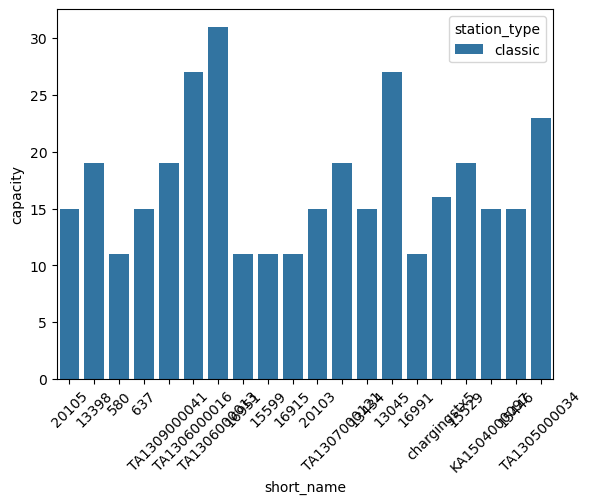

In [73]:
my_plot = sns.barplot(data=station_info_df[:20], x="short_name", y="capacity", hue="station_type")
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

### Información de las bicicletas disponibles en estaciones de chicago

En el siguiente apartado usaremos el api para obtener las bicicletas disponibles/libres de chicago

In [74]:
free_bikes_url = es_feed_df[es_feed_df["name"] == "free_bike_status"]['url'].values[0]
free_bikes_response = parse_response(requests.get(free_bikes_url))
free_bikes_data = free_bikes_response['data']['bikes']

free_bikes_df = pd.DataFrame.from_dict(free_bikes_data)
display(free_bikes_df.head())

,type,lon,is_disabled,name,lat,rental_uris,bike_id,fusion_lat,fusion_lon,is_reserved
0,electric_bike,-87.767012,0,139-896,41.967105,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",7e62e71ecc671152c7c1b9873bf2de36,0.0,0.0,0
1,electric_bike,-87.659592,0,870-442,41.844988,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",b946db451e7c20a6a1f841341f1484e4,0.0,0.0,0
2,electric_bike,-87.796885,0,783-555,41.791661,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",f8026aaaa57ed666fca47947f42445e2,0.0,0.0,0
3,electric_bike,-87.708023,0,458-810,41.772522,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",dc608640787107dccfb09e91a90f2c50,0.0,0.0,0
4,electric_bike,-87.703438,0,626-657,41.791330,"{'ios': 'https://chi.lft.to/lastmile_qr_scan',...",4dc44e143c3212ed6e9e30ac8d817dd6,0.0,0.0,0


Podemos observar el tipo de bicicletas que se encuentran libres, desconocemos el número total de bicicletas, pero la disponibilidad puede estar afectada por cual de ambas es más popular entre los usuarios

Text(0.5, 0, 'Tipo de bicicleta')

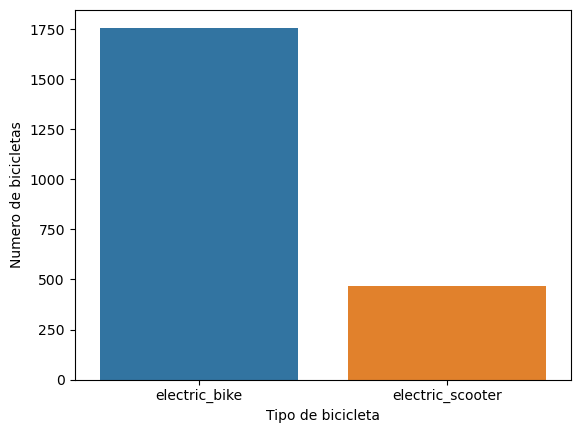

In [75]:
ax = sns.countplot(data=free_bikes_df, x="type", )
ax.set_ylabel("Numero de bicicletas")
ax.set_xlabel("Tipo de bicicleta")

## Análizando estaciones de bicicletas de MiBici en la ciudad de Guadalajara

A continuación usaremos el API de BikeShare para explorar que data encontramos relacionada con MiBici, un sistema de bicicletas públicas del Area Metropolitana de Guadalajara

En este endpoint podemos observar cuál es el estatus de las estaciones, por ejemplo podemos ver el numero de bicicletas disponibles asi como tambien el número de docks para bicicletas y las bicicletas deshabilitadas

In [76]:
station_status_url = 'https://guadalajara.publicbikesystem.net/customer/ube/gbfs/v1/en/station_status'
station_status_response = parse_response(requests.get(station_status_url))

station_status_df = pd.DataFrame.from_dict(station_status_response['data']['stations'])
display(station_status_df.head())

,station_id,num_bikes_available,num_bikes_available_types,num_bikes_disabled,num_docks_available,num_docks_disabled,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic
0,2,12,"{'mechanical': 12, 'ebike': 0}",0,3,0,1692659758,False,IN_SERVICE,1,1,1,None
1,3,2,"{'mechanical': 2, 'ebike': 0}",3,10,0,1692659574,False,IN_SERVICE,1,1,1,None
2,4,11,"{'mechanical': 11, 'ebike': 0}",0,8,0,1692659699,False,IN_SERVICE,1,1,1,None
3,5,1,"{'mechanical': 1, 'ebike': 0}",0,10,0,1692659613,False,IN_SERVICE,1,1,1,None
4,6,9,"{'mechanical': 9, 'ebike': 0}",1,1,0,1692659749,False,IN_SERVICE,1,1,1,None


También podemos observar información mas detallada de las caracterisitcas de las estaciones con el siguiente endpoint del api. Podemos revisar diferentes caracteristicas en las estaciones que puede ser útil para complementar el dataset del proyecto y poder entender ó descubrir caracteristicas que puedan ayudar a complementar nuestro proyecto

In [77]:
station_info_url = 'https://guadalajara.publicbikesystem.net/customer/ube/gbfs/v1/en/station_information'
station_info_response = parse_response(requests.get(station_info_url))

station_info_df = pd.DataFrame.from_dict(station_info_response['data']['stations'])
display(station_info_df.head())

,station_id,name,physical_configuration,lat,lon,altitude,address,post_code,capacity,is_charging_station,rental_methods,groups,obcn,nearby_distance,_ride_code_support,rental_uris
0,2,(GDL-001) C. Epigmenio Glez./ Av. 16 de Sept.,REGULAR,20.666378,-103.348820,0.0,(GDL-001) C. Epigmenio González / Av. 16 de Se...,44180,15,False,"[KEY, TRANSITCARD, CREDITCARD, PHONE]",[],GDL-001,500.0,True,{}
1,3,(GDL-002) C. Colonias / Av. Niños héroes,REGULAR,20.667228,-103.366000,1.0,(GDL-002) C. Colonias / Av. Niños Héroes,44160,15,False,"[KEY, TRANSITCARD, CREDITCARD, PHONE]",[],GDL-002,500.0,True,{}
2,4,(GDL-003) C. Vidrio / Av. Chapultepec,REGULAR,20.667690,-103.368252,1.0,(GDL-003) C. Vidrio / Av. Chapultepec,44160,19,False,"[KEY, TRANSITCARD, CREDITCARD, PHONE]",[],GDL-003,500.0,True,{}
3,5,(GDL-004) C. Ghilardi /C. Miraflores,REGULAR,20.691750,-103.362550,0.0,(GDL-004) C. Ghilardi / C. Miraflores *,44600,11,False,"[KEY, TRANSITCARD, CREDITCARD, PHONE]",[],GDL-004,500.0,True,{}
4,6,(GDL-005) C. San Diego /Calzada Independencia,REGULAR,20.681158,-103.339363,0.0,(GDL-005) C. San Diego / Calz. Independencia *,44280,11,False,"[KEY, TRANSITCARD, CREDITCARD, PHONE]",[],GDL-005,500.0,True,{}
